In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from virtart.object_detector import ObjectDetector
from PIL import Image
import numpy as np
from virtart.segment import Segmentor
import warnings
warnings.filterwarnings('ignore')


object_detector = ObjectDetector(device='gpu')
sam = Segmentor()

Loading checkpoint from checkpoints/yolov6n.pt

Fusing model...


# Show masks by SAM
The objects that were detected using our YOLOV6 model are now fed into SAM and we recieve the masks of those objects

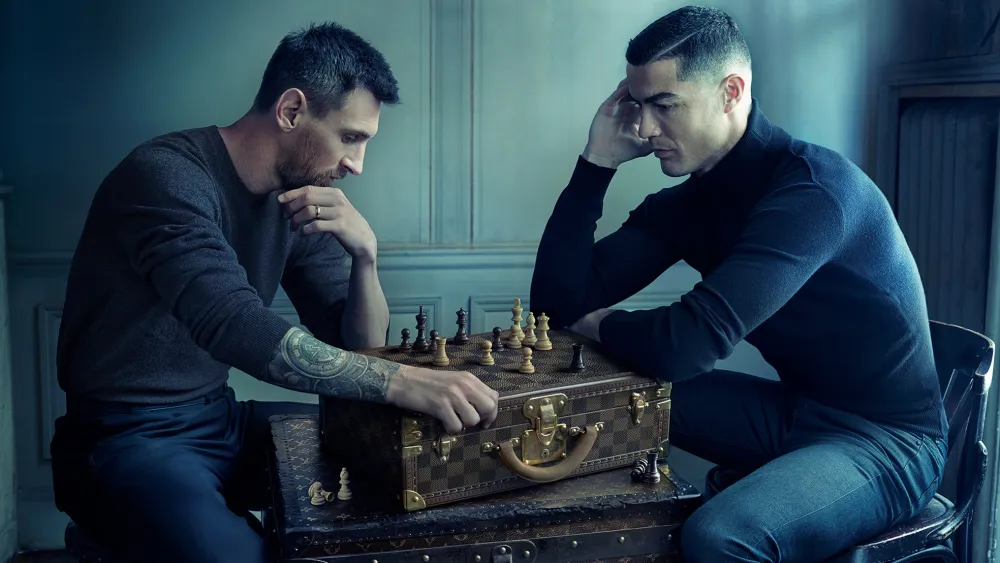

In [3]:
img = Image.open('imgs/CR7_Messi.jpg')
img_numpy = np.array(img)
img

For the same image as in yolo_presentation we now show the masks of the detected persons:

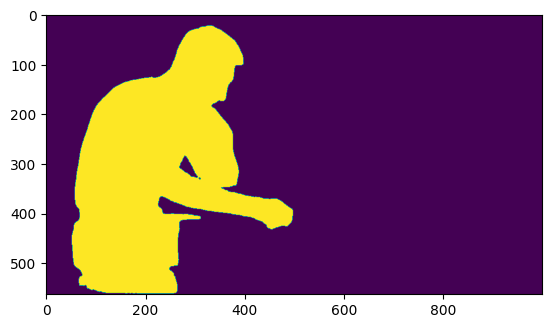

In [4]:
import matplotlib.pyplot as plt

detections = object_detector(img_numpy)
person_bboxes = [detection['bbox'] for detection in detections if detection['class']=='person']
masks = sam(img_numpy, person_bboxes)


plt.imshow(masks[0])

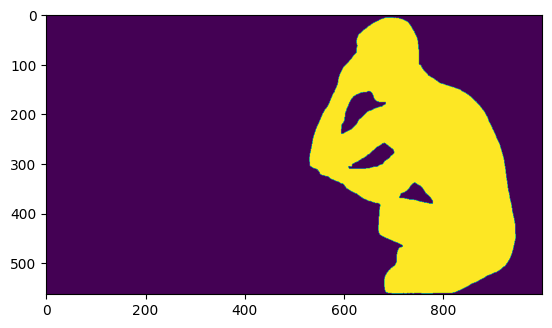

In [5]:
plt.imshow(masks[1])

These masks are the ones we use in the next step where we implement Neural Style transfer.